 # We’ll start with Notebook 1: 01_TCS_Data_Inspection_and_Cleaning.ipynb — it’ll load the data, explore it, clean it, and visualize basic trends.

# Notebook 1: Data Inspection & Cleaning (Full code)

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')


In [47]:
df = pd.read_csv('TCS_stock_history.csv') 
print("Shape:", df.shape)
df.head()



Shape: (4463, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [48]:
df.info()
print("\n Missing values:\n",df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB

 Missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [49]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


# Convert numeric columns and handle missing data

In [50]:
num_clom=['Open','High','Low','Close','Volume','Dividends','Stock Splits']
for c in num_clom:
    df[c]=pd.to_numeric(df[c],errors='coerce')
    
print("Missing after coercion:\n", df[num_clom].isnull().sum())


df.fillna(method='ffill',inplace=True)
df.dropna(inplace=True)

print('data shape :',df.shape)

Missing after coercion:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
data shape : (4463, 8)


# Descriptive statistics

In [51]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,4463,2012-08-23 19:22:31.109119488,2002-08-12 00:00:00,2008-02-14 12:00:00,2012-09-04 00:00:00,2017-03-22 12:00:00,2021-09-30 00:00:00,NaN
Open,4463.0,866.936239,24.146938,188.951782,530.90753,1156.462421,3930.0,829.905368
High,4463.0,876.675013,27.102587,191.571816,534.751639,1165.815854,3981.75,838.267104
Low,4463.0,856.65385,24.146938,185.979417,525.616849,1143.6228,3892.100098,821.233477
Close,4463.0,866.537398,26.377609,188.59462,529.713257,1154.784851,3954.550049,829.611313
Volume,4463.0,3537876.3594,0.0,1860959.0,2757742.0,4278625.0,88067154.0,3273530.747289
Dividends,4463.0,0.071533,0.0,0.0,0.0,0.0,40.0,0.965401
Stock Splits,4463.0,0.001344,0.0,0.0,0.0,0.0,2.0,0.051842


# Plot Close Price trend

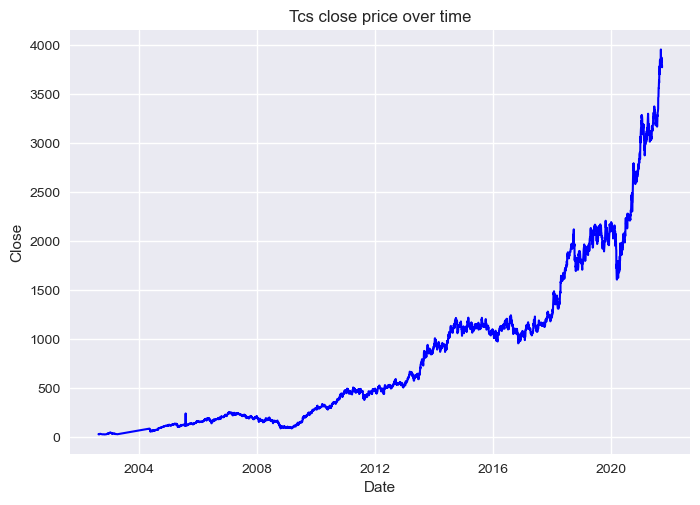

In [52]:
plt.Figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'], color='blue',linewidth=1.5)
plt.title('Tcs close price over time')
plt.xlabel('Date') ; plt.ylabel('Close')
plt.show()

# Plot Volume trend

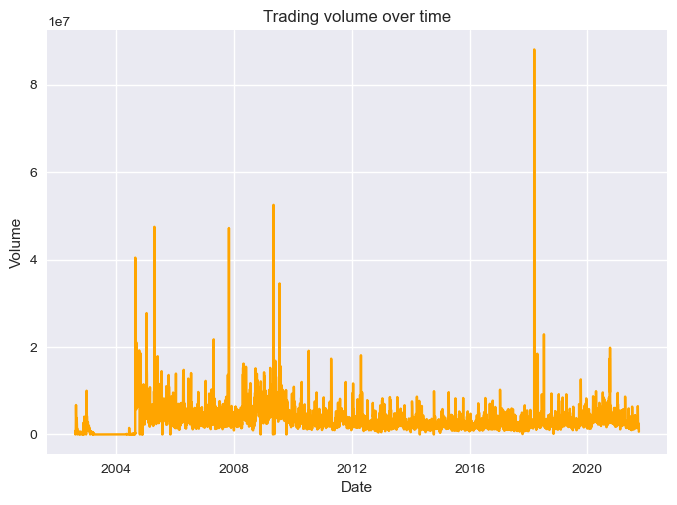

In [53]:
plt.Figure(figsize=(12,5))
plt.plot(df['Date'],df['Volume'],color='orange')
plt.title('Trading volume over time')
plt.xlabel('Date') ; plt.ylabel('Volume')
plt.show()

# Moving averages (50 & 200 day)

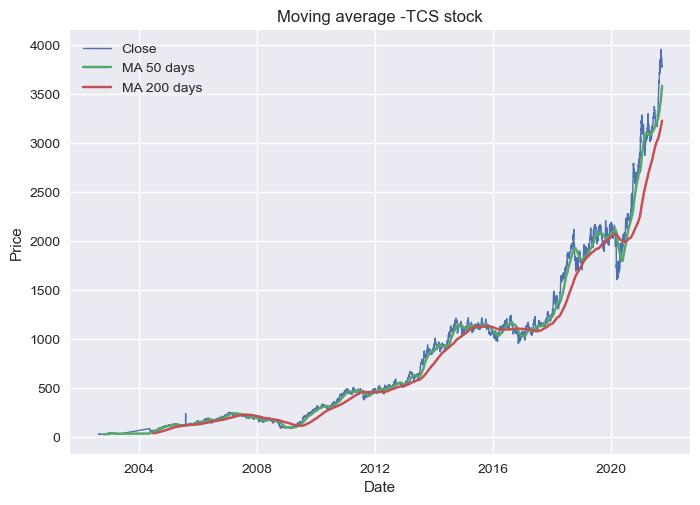

In [54]:
df['MA50']=df['Close'].rolling(50).mean()
df['MA200']=df['Close'].rolling(200).mean()

plt.Figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],label='Close',linewidth=1)
plt.plot(df['Date'],df['MA50'],label='MA 50 days')
plt.plot(df['Date'],df['MA200'],label='MA 200 days')
plt.title('Moving average -TCS stock')
plt.xlabel('Date') ; plt.ylabel('Price')
plt.legend()
plt.show()

# Daily returns and volatility

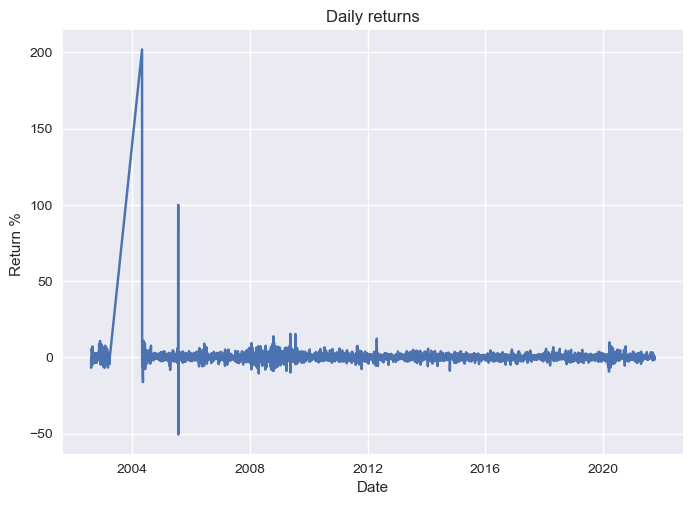

count    4462.000000
mean        0.161259
std         4.010903
min       -50.611112
25%        -0.908579
50%         0.042393
75%         1.096282
max       201.888698
Name: Daily_return, dtype: float64


In [55]:
df['Daily_return'] = df['Close'].pct_change()*100

plt.Figure(figsize=(10,5))
plt.plot(df['Date'],df['Daily_return'])
plt.title('Daily returns')
plt.xlabel('Date') ; plt.ylabel('Return % ')
plt.show()

print(df['Daily_return'].describe())

# Correlation heatmap

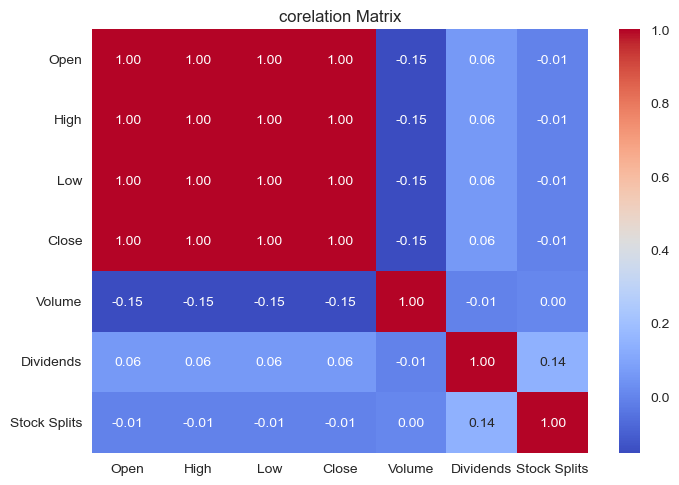

In [56]:
plt.Figure(figsize=(10,5))
sns.heatmap(df[num_clom].corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.title('corelation Matrix')
plt.show()

# Save the cleaned dataset

In [58]:
df.to_csv('TCS_stock_cleaned.csv', index=False)
print(" Cleaned data saved to data/TCS_stock_cleaned.csv")



 Cleaned data saved to data/TCS_stock_cleaned.csv


# At this point you have:

Cleaned and verified dataset

Exploratory visuals and correlations

TCS_stock_cleaned.csv ready for modeling